In [86]:
import numpy as np
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from adaboost import *
from gradient_boosting_mse import *


In [63]:
X_train, y_train = load_dataset("data-hw3/rent-ideal.csv")

## Q3 (2)

In [64]:
iters = [2000, 3000, 4000, 5000, 6000, 7000]

In [65]:
def num_tree_gdb(iters, X_train, y_train):
    r2s = []
    for i in iters:
        y_mean, trees = gradient_boosting_mse(X_train, y_train, num_iter=i, max_depth=2, nu=0.1)
        y_hat_train = gradient_boosting_predict(X_train, trees, y_mean, nu=0.1)
        r2 = np.around(r2_score(y_train, y_hat_train), decimals=4)
        r2s.append(r2)
    return r2s


In [66]:
r2s = num_tree_gdb(iters, X_train, y_train)

In [72]:
def num_tree_xgdb(iters, X_train, y_train):
    r2s = []
    for i in iters:
        model = xgb.XGBRegressor(n_estimators=i, max_depth=2, learning_rate=0.1, objective='reg:squarederror')
        model.fit(X_train, y_train)
        y_hat_train = model.predict(X_train)
        r2 = r2_score(y_train, y_hat_train)
        r2s.append(r2)
    return r2s

In [68]:
r2s_xgb = num_tree_xgdb(iters, X_train, y_train)

In [69]:
r2s

[0.7762, 0.7881, 0.7964, 0.8021, 0.8067, 0.8102]

In [70]:
r2s_xgb

[0.7614297686723767,
 0.7693355890377345,
 0.7744624866874165,
 0.7785228277650135,
 0.7815921995909797,
 0.7842714731615645]

In [80]:
df = pd.DataFrame({
    'num tree': iters,
    'R^2': r2s,
    'R^2 xgb': r2s_xgb
})
df

,num tree,R^2,R^2 xgb
0,2000,0.7762,0.761430
1,3000,0.7881,0.769336
2,4000,0.7964,0.774462
3,5000,0.8021,0.778523
4,6000,0.8067,0.781592
5,7000,0.8102,0.784271


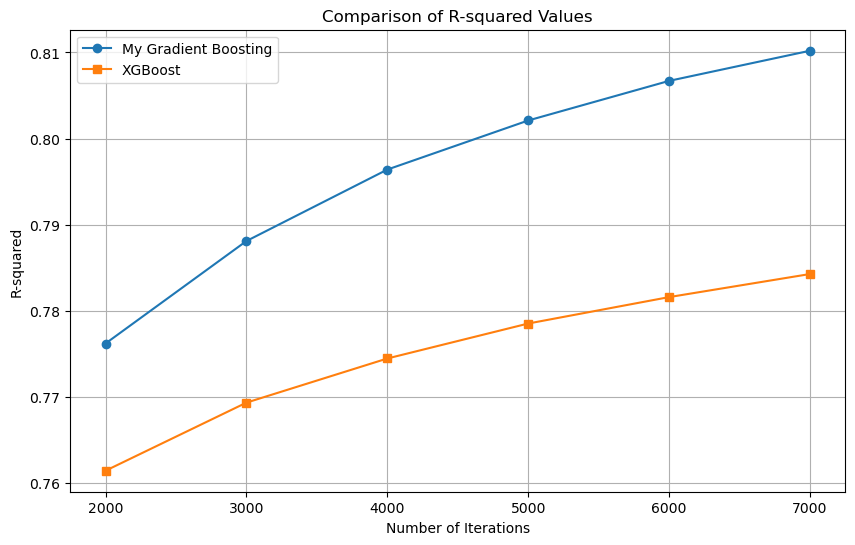

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(iters, r2s, marker='o', label='My Gradient Boosting')
plt.plot(iters, r2s_xgb, marker='s', label='XGBoost')
plt.xlabel('Number of Iterations')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared Values')
plt.legend()
plt.grid(True)
plt.show()

### Comment:
#### as the number of trees increases from 2000 to 7000, the R squared value of our gradient boost and xgb both increases. However, the R-squared value of xgb package is not as high as our gradient boost.

## Q3 (3)

### We explore the relationship between R^2 values and the values of max_depth

In [117]:
depths = [1, 2, 3, 4, 5]
def num_depth_xgdb(depths, X_train, y_train):
    r2s = []
    for i in depths:
        model = xgb.XGBRegressor(n_estimators=2000, max_depth=i, learning_rate=0.1, objective='reg:squarederror')
        model.fit(X_train, y_train)
        y_hat_train = model.predict(X_train)
        r2 = r2_score(y_train, y_hat_train)
        r2s.append(r2)
    return r2s

In [118]:
def num_depth_gdb(depths, X_train, y_train):
    r2s = []
    for i in depths:
        y_mean, trees = gradient_boosting_mse(X_train, y_train, num_iter=2000, max_depth=i, nu=0.1)
        y_hat_train = gradient_boosting_predict(X_train, trees, y_mean, nu=0.1)
        r2 = np.around(r2_score(y_train, y_hat_train), decimals=4)
        r2s.append(r2)
    return r2s

In [119]:
r2s_depth_xgb = num_depth_xgdb(depths, X_train, y_train)
r2s_depth_xgb

[0.6817016692649376,
 0.7614297686723767,
 0.8191484001539768,
 0.869121827078186,
 0.9041040210538217]

In [120]:
r2s_depth_my = num_depth_gdb(depths, X_train, y_train)
r2s_depth_my

[0.6835, 0.7762, 0.8369, 0.8864, 0.9191]

In [109]:
df3 = pd.DataFrame({
    'learn rate': depths,
    'R^2 xgb': r2s_depth_xgb,
    'R^2 my code': r2s_depth_my})
df3

,learn rate,R^2 xgb,R^2 my code
0,0.1,0.681702,0.6835
1,0.3,0.688251,0.3809
2,0.6,0.693133,0.2112
3,0.9,0.697174,0.1461
4,1.2,0.701196,0.1121
5,1.5,0.705712,0.0914


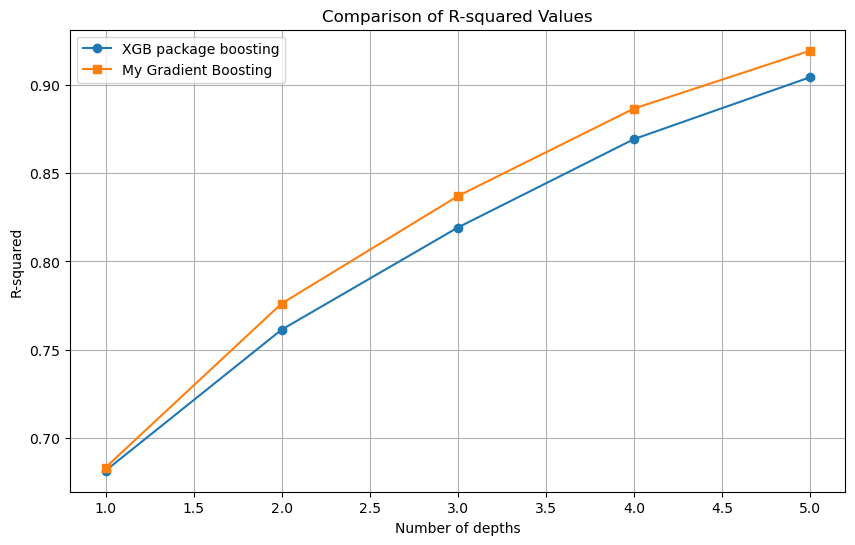

In [121]:
plt.figure(figsize=(10, 6))
plt.plot(depths, r2s_depth_xgb, marker='o', label='XGB package boosting')
plt.plot(depths, r2s_depth_my, marker='s', label='My Gradient Boosting')
plt.xlabel('Number of depths')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared Values')
plt.legend()
plt.grid(True)
plt.show()

### Comment:
#### We found that as the max_depth increases from 1 to 5, the R^2 values increases from 0.68 to more than 0.90. In this process, my gradient boosting has slightly higher R^2 values than the XGB package. 